In [48]:
import torch
import matplotlib.pyplot as plt
import os
import matplotlib.gridspec as gridspec
import numpy as np
from visualization_utils import plot_confusion_matrix, load_testing_checkpoint, show_metrics, plot_roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [49]:
# checkpoint_path_1024 = r"C:\Users\Gert\repos\CS2_cheat_detection\Transformer\checkpoints\model_1024_epoch_99_testdata.pth"
# checkpoint_path_1024_lr1e5 = r"C:\Users\Gert\repos\CS2_cheat_detection\Transformer\checkpoints\model_1024_epoch_99_lr1e-3_testdata.pth"
# checkpoint_path_1024 = r"C:\Users\gluzk\source\repos\CS2_cheat_detection\Transformer\checkpoints\model_1024_epoch_99_testdata.pth"
# checkpoint_path_1024_lr1e5 = r"C:\Users\gluzk\source\repos\CS2_cheat_detection\Transformer\checkpoints\model_1024_epoch_99_lr1e-3_testdata.pth"
# checkpoint_path_256_2layer_2head_176ff = r"C:\Users\gluzk\source\repos\CS2_cheat_detection\Transformer\checkpoints\model_256_epoch_14_2layer_2head_176ff_testdata.pth"
checkpoint_path_256_4layer_1head = r"C:\Users\gluzk\source\repos\CS2_cheat_detection\Transformer\checkpoints\model_256_epoch_4_4layer_1head_176ff_testdata.pth"

In [50]:
# metrics_1024 = load_testing_checkpoint(checkpoint_path_1024)
# metrics_1024_lr1e5 = load_testing_checkpoint(checkpoint_path_1024_lr1e5)
metrics = load_testing_checkpoint(checkpoint_path_256_4layer_1head)

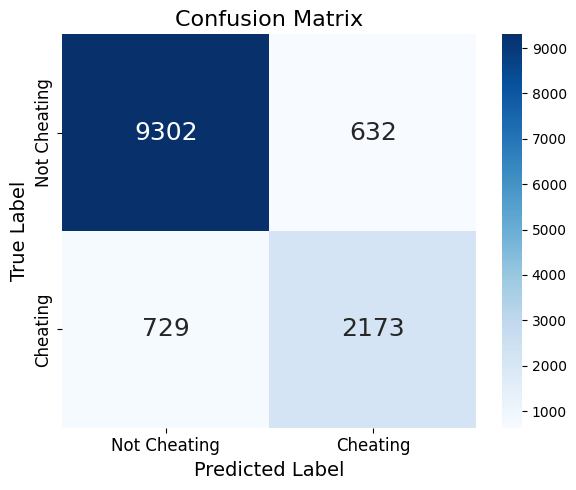

Metric,Value
Accuracy,0.8940
Precision,0.7747
Recall,0.7488
F1-Score,0.7615
Specificity,0.9364
AUC,0.9336


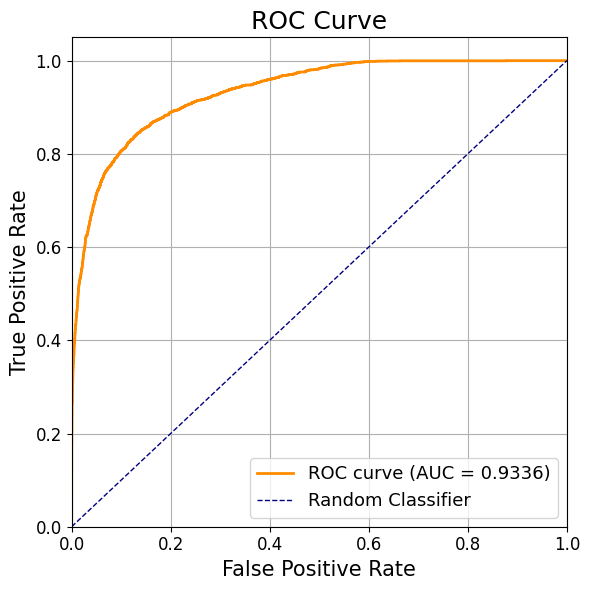

In [51]:
plot_confusion_matrix(metrics['tp'], metrics['fp'], metrics['tn'], metrics['fn'])
specificity = metrics['tn'] / (metrics['tn']+metrics['fp'])
show_metrics(metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1'], specificity, metrics['roc'])
plot_roc_curve(metrics['y_true'], metrics['y_scores'])
# for i in range(len(metrics['y_true'])):
#     print(f"pred: {np.round(metrics['y_scores'][i], 2)}; true: {metrics['y_true'][i]}")


In [52]:
def create_confusion_matrix_custom_threshold(y_true, y_score, threshold=0.5):
    y_pred = np.where(np.array(y_score) > threshold, 1, 0)
    y_true = np.array(y_true)
    # cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn, fp, fn, tp, y_true, y_score, y_pred

In [53]:
tn, fp, fn, tp, y_true, y_score, y_pred = create_confusion_matrix_custom_threshold(metrics['y_true'], metrics['y_scores'], threshold=0.7)

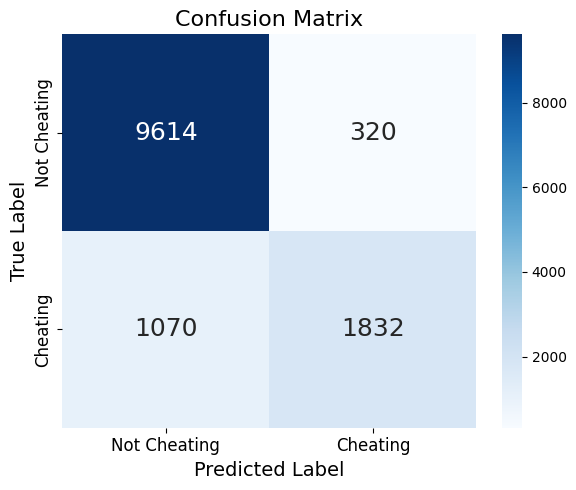

Metric,Value
Accuracy,0.8917
Precision,0.8513
Recall,0.6313
F1-Score,0.7250
Specificity,0.9678
AUC,0.9336


In [54]:
plot_confusion_matrix(tp, fp, tn, fn)
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc = roc_auc_score(y_true, y_score)
specificity = tn / (tn+fp)
show_metrics(acc, precision, recall, f1, specificity, roc)

In [55]:
# SINGLE CASE

path = r"C:\Users\gluzk\source\repos\CS2_cheat_detection\Transformer\checkpoints\model_256_epoch_4_4layer_1head_176ff_testsinglecase.pth"
metrics = load_testing_checkpoint(path)
for i in range(len(metrics['y_true'])):
    print(f"pred: {np.round(metrics['y_scores'][i], 2)}; true: {metrics['y_true'][i]}")

pred: 0.9100000262260437; true: 1.0
pred: 0.8999999761581421; true: 1.0
pred: 0.9700000286102295; true: 1.0
pred: 0.9700000286102295; true: 1.0
pred: 0.800000011920929; true: 1.0
pred: 0.9599999785423279; true: 1.0
pred: 0.9700000286102295; true: 1.0
pred: 0.9800000190734863; true: 1.0
pred: 0.9800000190734863; true: 1.0
pred: 0.9700000286102295; true: 1.0
pred: 0.9599999785423279; true: 1.0
pred: 0.9800000190734863; true: 1.0
pred: 0.15000000596046448; true: 1.0
pred: 0.8399999737739563; true: 1.0
pred: 0.3199999928474426; true: 1.0
pred: 0.9800000190734863; true: 1.0
pred: 0.9700000286102295; true: 1.0
pred: 0.949999988079071; true: 1.0
pred: 0.949999988079071; true: 1.0
pred: 0.9800000190734863; true: 1.0
pred: 0.949999988079071; true: 1.0
pred: 0.9800000190734863; true: 1.0
pred: 0.9800000190734863; true: 1.0
pred: 0.8299999833106995; true: 1.0
pred: 0.9700000286102295; true: 1.0
pred: 0.9599999785423279; true: 1.0
pred: 0.2199999988079071; true: 1.0
pred: 0.9800000190734863; true:

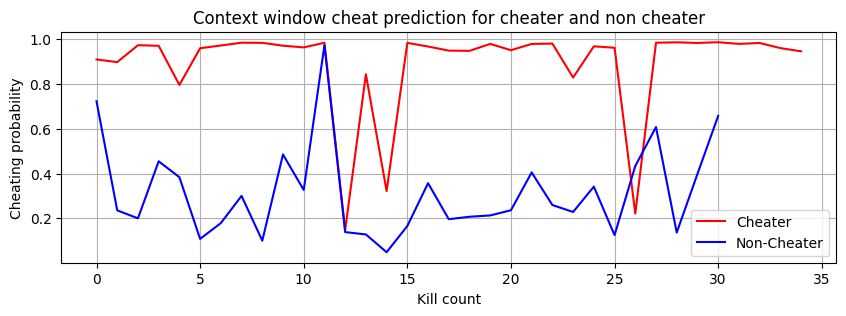

In [56]:
y_true = np.array(metrics['y_true']).flatten()
y_scores = np.array(metrics['y_scores']).flatten()

cheater_indices = np.where(y_true == 1)[0]
non_cheater_indices = np.where(y_true == 0)[0]

cheater_scores = y_scores[cheater_indices]
non_cheater_scores = y_scores[non_cheater_indices]

cheater_x = np.arange(len(cheater_scores))
non_cheater_x = np.arange(len(non_cheater_scores))

plt.figure(figsize=(10, 3))
plt.plot(cheater_x, cheater_scores, label='Cheater', color='red')
plt.plot(non_cheater_x, non_cheater_scores, label='Non-Cheater', color='blue')

plt.xlabel('Kill count')
plt.ylabel('Cheating probability')
plt.title('Context window cheat prediction for cheater and non cheater')
plt.legend()
plt.grid(True)
plt.show()